<a href="https://colab.research.google.com/github/thanhphap059/NguyenThanhPhap19146230/blob/main/NHAN_DIEN_NGUOI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#BÀI 4: NHẬN DIỆN NGƯỜI
#Tên: Nguyễn Thanh Pháp
#MSSV: 19146230
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Chuyển đến file Google Drive chứa bộ ảnh đã tạo
%cd"/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_NGUOI/"

/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_NGUOI


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_NGUOI/training_set',target_size=(256,256), batch_size=32, class_mode='categorical')

Found 149 images belonging to 3 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_NGUOI/validation',target_size=(256,256), batch_size=32, class_mode='categorical')

Found 24 images belonging to 3 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'DANH': 0, 'NHAN': 1, 'PHAP': 2}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'DANH': 0, 'NHAN': 1, 'PHAP': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(256,256,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(256,256,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(256,256,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                  

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
5/5 [==============================] - 74s 14s/step - loss: 21.1323 - accuracy: 0.3087 - val_loss: 4.7916 - val_accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 71s 13s/step - loss: 2.1297 - accuracy: 0.3356 - val_loss: 1.0758 - val_accuracy: 0.3333
Epoch 3/100
5/5 [==============================] - 71s 13s/step - loss: 1.0620 - accuracy: 0.4027 - val_loss: 1.0154 - val_accuracy: 0.3750
Epoch 4/100
5/5 [==============================] - 71s 15s/step - loss: 0.8851 - accuracy: 0.6510 - val_loss: 0.8558 - val_accuracy: 0.4583
Epoch 5/100
5/5 [==============================] - 71s 13s/step - loss: 0.6282 - accuracy: 0.7718 - val_loss: 0.7275 - val_accuracy: 0.6250
Epoch 6/100
5/5 [==============================] - 71s 14s/step - loss: 0.4527 - accuracy: 0.8322 - val_loss: 0.4686 - val_accuracy: 0.7500
Epoch 7/100
5/5 [==============================] - 71s 13s/step - loss: 0.3375 - accuracy: 0.8658 - val_loss: 0.5112 - val_accuracy: 0.7917
Epoch 8/100
5/5 [==

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.04975936561822891
Train Accuracy 0.9798657894134521


<function matplotlib.pyplot.show>

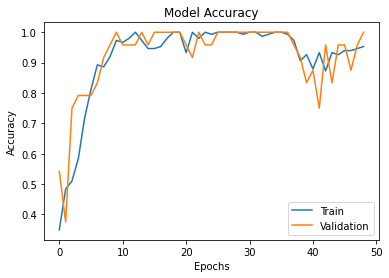

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhan_dien_nguoi.h5")

In [ ]:
model_nhandien=load_model('Nhan_dien_nguoi.h5')

In [ ]:
# Kiểm tra hình của từng bạn với bộ dữ liệu test_set
img=load_img("/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_NGUOI/test_set/NHAN/Nhan (19).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='DAY LA PHAP'
if round(result[0][1])==1:
  prediction='DAY LA DANH'
if round(result[0][2])==1:
  prediction='DAY LA NHAN'
print(prediction)



In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_NGUOI/test_set/DANH/Danh (9).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='DAY LA PHAP'
if round(result[0][1])==1:
  prediction='DAY LA DANH'
if round(result[0][2])==1:
  prediction='DAY LA NHAN'
print(prediction)

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/BTW13/NHAN_DIEN_NGUOI/test_set/PHAP/Phap (5).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='DAY LA PHAP'
if round(result[0][1])==1:
  prediction='DAY LA DANH'
if round(result[0][2])==1:
  prediction='DAY LA NHAN'
print(prediction)